In [121]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns

# Exploration Dataset ==> https://huggingface.co/datasets/SaguaroCapital/sentiment-analysis-in-commodity-market-gold

In [122]:
data=load_dataset("SaguaroCapital/sentiment-analysis-in-commodity-market-gold")

In [123]:
data

DatasetDict({
    train: Dataset({
        features: ['Dates', 'URL', 'News', 'Price Direction Up', 'Price Direction Constant', 'Price Direction Down', 'Asset Comparision', 'Past Information', 'Future Information', 'Price Sentiment'],
        num_rows: 8456
    })
    test: Dataset({
        features: ['Dates', 'URL', 'News', 'Price Direction Up', 'Price Direction Constant', 'Price Direction Down', 'Asset Comparision', 'Past Information', 'Future Information', 'Price Sentiment'],
        num_rows: 2114
    })
})

In [134]:
data['train'][5]

{'Dates': '10-05-2006',
 'URL': 'http://www.marketwatch.com/story/spot-gold-quoted-at-70710-in-asia-trade-2006-05-10',
 'News': 'spot gold quoted at $707.10 in asia trade',
 'Price Direction Up': 1,
 'Price Direction Constant': 0,
 'Price Direction Down': 0,
 'Asset Comparision': 0,
 'Past Information': 1,
 'Future Information': 0,
 'Price Sentiment': 'positive'}

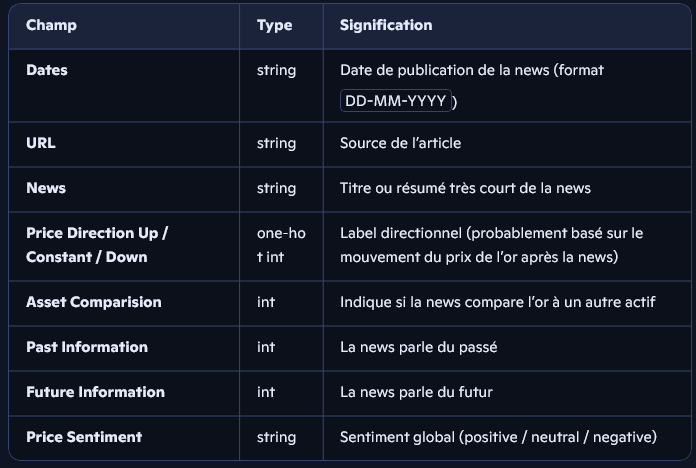

# Pour transformer l'objet dataset en DF pandas

In [125]:
df_train = data["train"].to_pandas()
df_train.dtypes

Dates                       object
URL                         object
News                        object
Price Direction Up           int64
Price Direction Constant     int64
Price Direction Down         int64
Asset Comparision            int64
Past Information             int64
Future Information           int64
Price Sentiment             object
dtype: object

# COnversion en format Datime avec gestion des formats mixes ==> s'il ne les reconnait pas ==> return NaT

In [126]:
df_train["Dates"] = pd.to_datetime(df_train["Dates"], format="mixed", dayfirst=True, errors="coerce",utc=True)
df_train["News"] = df_train["News"].astype(dtype=str)

In [127]:
df_train.dtypes

Dates                       datetime64[ns, UTC]
URL                                      object
News                                     object
Price Direction Up                        int64
Price Direction Constant                  int64
Price Direction Down                      int64
Asset Comparision                         int64
Past Information                          int64
Future Information                        int64
Price Sentiment                          object
dtype: object

In [128]:
df_train.head(2)

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,2007-12-25 00:00:00+00:00,https://economictimes.indiatimes.com/articlesh...,gold prices recover on buying support,1,0,0,0,1,0,positive
1,2016-11-30 00:00:00+00:00,http://www.marketwatch.com/story/february-gold...,"February gold falls $7.20, or 0.7%, at $1,183....",0,0,1,0,1,0,negative


In [129]:
df_train[df_train["Dates"].isna()]

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
185,NaT,http://www.marketwatch.com/story/dec-gold-move...,dec. gold moves up by $1.60 to $587.80/oz afte...,1,0,0,0,1,0,positive
510,NaT,http://www.marketwatch.com/story/gold-futures-...,"gold futures fall, hold recent trading range",0,0,1,0,1,0,negative
511,NaT,http://www.marketwatch.com/story/gold-oil-hold...,"gold, oil hold on to gains post bernanke",1,0,0,1,1,0,positive
585,NaT,http://www.marketwatch.com/story/april-gold-up...,"April gold up $5.50, or 0.5%, to $1,239.50/oz ...",1,0,0,0,1,0,positive
700,NaT,http://www.marketwatch.com/story/june-gold-up-...,june gold up $7.90 at $631.20/oz after $632.70...,1,0,0,0,1,0,positive
...,...,...,...,...,...,...,...,...,...,...
8306,NaT,http://www.marketwatch.com/story/gold-inclusio...,gold inclusion as tier 1 asset would be huge: ...,0,0,0,0,1,0,none
8373,NaT,http://www.marketwatch.com/story/the-message-o...,gold and bonds agree,0,0,0,0,1,0,none
8390,NaT,http://www.marketwatch.com/story/crude-gold-fu...,"crude, gold futures pull back in late morning ...",0,0,1,1,1,0,negative
8398,NaT,http://www.marketwatch.com/story/gold-prices-c...,gold prices continue to slip after overnight t...,0,0,1,0,1,0,negative


In [130]:
df_train = df_train.dropna()

In [131]:
news_count_per_dates = df_train.groupby("Dates")["News"].count().sort_values(ascending=True)

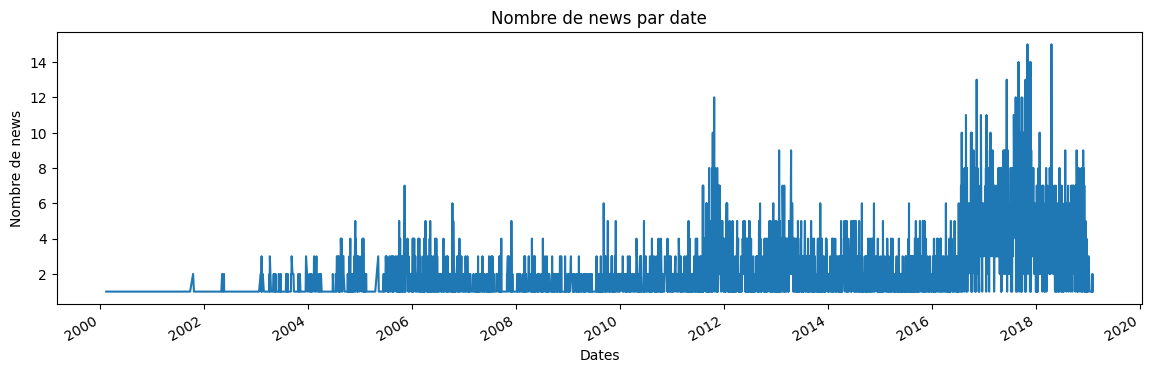

In [132]:
import matplotlib.pyplot as plt

news_count_per_dates.sort_index().plot(figsize=(14,4))
plt.xlabel("Dates")
plt.ylabel("Nombre de news")
plt.title("Nombre de news par date")
plt.show()

# Yfinance Exploration